In [144]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import csv as csv
data_path = "./data/"
init_notebook_mode(connected=True)

In [145]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
AUTHOR = "hayashi"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", AUTHOR, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
def bar(dataframe, col_name, title, color=[], h=400, w=600, lm=100, limit=100, return_trace=False, rev=False, xlb=False):
    cnt_srs = dataframe[col_name].value_counts()
    yy = cnt_srs.head(limit).index[::-1]
    xx = cnt_srs.head(limit).values[::-1]
    if rev:
        yy = cnt_srs.tail(limit).index[::-1]
        xx = cnt_srs.tail(limit).values[::-1]
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation='h')
    else:
        trace = go.Bar(y=yy, x=xx, orientation='h')
    if return_trace:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def pie(dataframe, col_name, title, color=[], h=400,lm=100, limit=100, return_trace=False, xlb=False):
    cnt_sns = dataframe[col_name].value_counts()
    labels = cnt_sns.index
    values = cnt_sns.values
    trace = go.Pie(labels=labels, values=values)
    if return_trace:
        return trace
    layout = go.Layout(title=title, height=h)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)

In [3]:
application = pd.read_csv(data_path + "application_train.csv")
some_application = application[:5000]

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
bar(application, col_name="TARGET", title="target")

In [8]:
pie(application, "TARGET", "target")

In [9]:
bar(application, "CODE_GENDER", "gender")

In [10]:
pie(application, "CODE_GENDER", "male female")

In [11]:
df_female = application[application['CODE_GENDER'] == 'F']
pie(df_female, "TARGET", "female and target")
df_male = application[application['CODE_GENDER'] == 'M']
pie(df_male, "TARGET", "male and target")

In [12]:
pie(application, "NAME_FAMILY_STATUS", "family")
pie(application[application["NAME_FAMILY_STATUS"]=="Married"], "TARGET", "married target")

In [71]:
some_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,4.999000e+03,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,102920.935000,0.077200,0.406200,1.680364e+05,5.976345e+05,27047.642400,5.376322e+05,0.020979,-16026.344800,64090.334600,...,0.006200,0.000400,0.00060,0.000400,0.008786,0.008324,0.035607,0.266821,0.277225,1.875145
std,1688.918602,0.266935,0.710002,9.777104e+04,4.010417e+05,14391.608732,3.686224e+05,0.014103,4326.863675,141508.266443,...,0.078503,0.019998,0.02449,0.019998,0.095778,0.125127,0.197414,0.936475,0.627501,1.838318
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101475.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16484.625000,2.385000e+05,0.010006,-19571.250000,-2769.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102915.500000,0.000000,0.000000,1.440000e+05,5.084955e+05,24939.000000,4.500000e+05,0.018850,-15807.500000,-1205.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,104375.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12450.500000,-295.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,105849.000000,1.000000,7.000000,1.935000e+06,2.517300e+06,135936.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.00000,1.000000,2.000000,4.000000,3.000000,16.000000,8.000000,11.000000


In [5]:
def replace_outlier(series, bias=1.5):
    #四分位数
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1

    #外れ値の基準点
    outlier_min = q1 - (iqr) * bias
    outlier_max = q3 + (iqr) * bias

    print("outlier_min :" + str(outlier_min) + ", outlier_max :" + str(outlier_max))

    #外れ値をクリップする
    series = series.clip(outlier_min, outlier_max)
    return series

In [24]:
some_application["AMT_INCOME_TOTAL"] = replace_outlier(some_application["AMT_INCOME_TOTAL"])

outlier_min :-22500.0, outlier_max :337500.0


/home/hayashi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


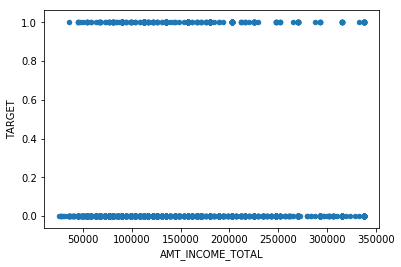

In [26]:
some_application.plot(kind="scatter", x="AMT_INCOME_TOTAL", y="TARGET")

In [16]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b7d61b438>,
      dtype=object)

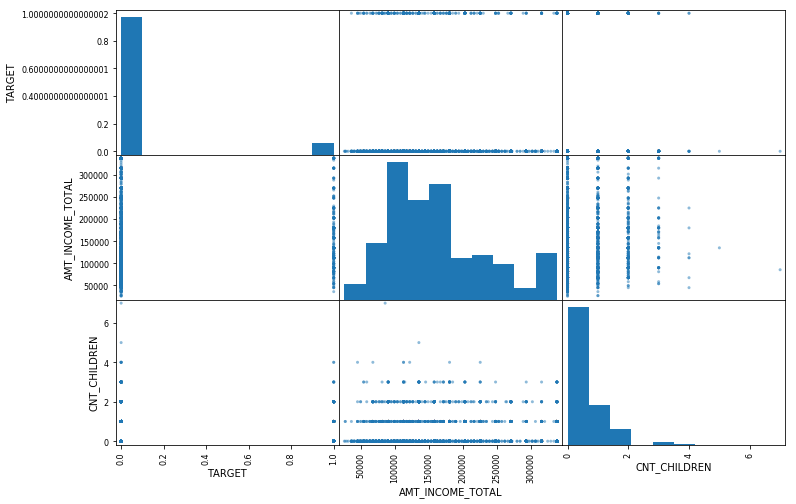

In [27]:
attributes = ["TARGET", "AMT_INCOME_TOTAL", "CNT_CHILDREN"]
scatter_matrix(some_application[attributes], figsize=(12,8))

# 勾配ブースト使ってみる

## データクリーニング

In [4]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [63]:
col_list = application.columns.values
col_list = col_list[2:]
col_list = ["NAME_CONTRACT_TYPE","CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]

In [76]:
app_x = application[col_list]
app_y = application["TARGET"]

In [77]:
app_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
NAME_CONTRACT_TYPE    307511 non-null object
CODE_GENDER           307511 non-null object
FLAG_OWN_CAR          307511 non-null object
FLAG_OWN_REALTY       307511 non-null object
CNT_CHILDREN          307511 non-null int64
AMT_INCOME_TOTAL      307511 non-null float64
AMT_CREDIT            307511 non-null float64
AMT_ANNUITY           307499 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.8+ MB


In [78]:
app_x.shape

(307511, 8)

In [79]:
app_x.isnull().any(axis=0)

NAME_CONTRACT_TYPE    False
CODE_GENDER           False
FLAG_OWN_CAR          False
FLAG_OWN_REALTY       False
CNT_CHILDREN          False
AMT_INCOME_TOTAL      False
AMT_CREDIT            False
AMT_ANNUITY            True
dtype: bool

In [80]:
app_x.isnull().sum()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY           12
dtype: int64

In [81]:
median = app_x["AMT_ANNUITY"].median()
app_x["AMT_ANNUITY"].fillna(median, inplace=True)

/home/hayashi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [82]:
app_x.isnull().sum()

NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ohe = OneHotEncoder()

In [95]:
def category_to_num(df):
    enced = df
    for col in df:
        if df[col].dtype == 'object':
            enced[col], cat = app_x[col].factorize()
    #         print(cat)
    #         ohe = OneHotEncoder()
    #         enced_1hot = ohe.fit_transform(cat_enced.reshape(1,-1))
    #         # print(enced_1hot.toarray())
    return enced

In [96]:
enced_x = category_to_num(app_x)

/home/hayashi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## 学習

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(enced_x, app_y)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.5, random_state=42)

In [104]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
y_pred = gbrt.predict(X_test)

## モデルの評価

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

In [129]:
print("accuracy:{}\nprecision:{}\nrecall:{}".format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)))

accuracy:0.9193657483285205
precision:0.1
recall:0.0006486135884546781


In [138]:
y_scores = gbrt.decision_function(X_test)

In [139]:
fpr, tpr, th = roc_curve(y_test, y_scores)

In [140]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Saving figure roc_gbrt


NameError: name 'os' is not defined

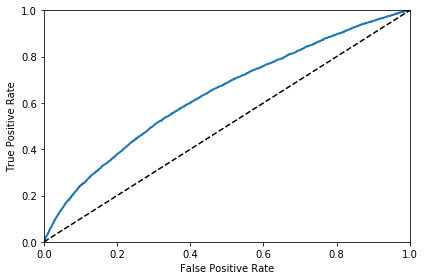

In [143]:
plot_roc_curve(fpr, tpr)
save_fig("roc_gbrt")
plt.show()